<a href="https://colab.research.google.com/github/Vonewman/Deep-Learning/blob/master/Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classes

In [4]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [5]:
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, 
                                 train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, 
                                train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [6]:
class FMNIST(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

model = FMNIST()

In [10]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [11]:
num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        cum_loss += loss.item()

    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.033817462257739
Training loss: 0.5608075980120885
Training loss: 0.49144349259926057


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 7
img = images[test_image_id].view(1, 784)

with torch.no_grad():
    logps = model(img)

In [19]:
ps = torch.exp(logps)
ps

tensor([[5.7285e-03, 3.9014e-04, 9.4748e-02, 2.3213e-03, 2.1678e-01, 5.0464e-04,
         6.6439e-01, 7.3863e-07, 1.5131e-02, 7.2005e-06]])

In [20]:
nps = ps.numpy()[0]
nps

array([5.7284618e-03, 3.9013839e-04, 9.4747536e-02, 2.3212975e-03,
       2.1677692e-01, 5.0464313e-04, 6.6439217e-01, 7.3863174e-07,
       1.5130879e-02, 7.2004655e-06], dtype=float32)

<BarContainer object of 10 artists>

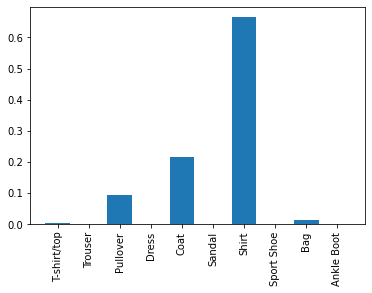

In [21]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                 'Sandal','Shirt','Sport Shoe','Bag','Ankle Boot']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

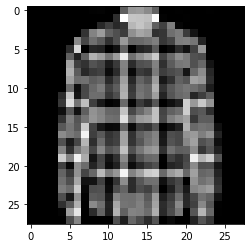

In [22]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')